In [47]:
#Importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, Normalizer
import seaborn as sns
import scipy.stats
from imblearn.over_sampling import SMOTE
from sklearn.metrics import silhouette_score
from sklearn_pandas import DataFrameMapper
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from sklearn.metrics import davies_bouldin_score

In [2]:
#load dataset
url = 'https://raw.githubusercontent.com/afidas/consumers-purchase-intention/main/online_shoppers_intention.csv'
df = pd.read_csv(url)

# Data Cleansing

In [3]:
#View data
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape

(12330, 18)

In [5]:
#check data summary
def summary(df):
    
    columns = df.columns.to_list()
    
    dtypes = []
    unique_counts = []
    missing_counts = []
    missing_percentages = []
    total_counts = [df.shape[0]] * len(columns)

    for col in columns:
        dtype = str(df[col].dtype)
        dtypes.append(dtype)
        unique_count = df[col].nunique()
        unique_counts.append(unique_count)
        missing_count = df[col].isnull().sum()
        missing_counts.append(missing_count)
        missing_percentage = round((missing_count/df.shape[0]) * 100, 2)
        missing_percentages.append(missing_percentage)

    df_summary = pd.DataFrame({
        "column": columns,
        "dtypes": dtypes,
        "unique_count": unique_counts,
        "missing_values": missing_counts,
        "missing_percentage": missing_percentages,
        "total_count": total_counts,
    })

    return df_summary.sort_values(by="missing_percentage", ascending=False).reset_index(drop=True)

summary(df)

,column,dtypes,unique_count,missing_values,missing_percentage,total_count
0,Administrative,int64,27,0,0.0,12330
1,Administrative_Duration,float64,3335,0,0.0,12330
2,Weekend,bool,2,0,0.0,12330
3,VisitorType,object,3,0,0.0,12330
4,TrafficType,int64,20,0,0.0,12330
5,Region,int64,9,0,0.0,12330
6,Browser,int64,13,0,0.0,12330
7,OperatingSystems,int64,8,0,0.0,12330
8,Month,object,10,0,0.0,12330
9,SpecialDay,float64,6,0,0.0,12330


## Drop Column

In [6]:
#drop unrelated variables
df = df.drop(columns=['SpecialDay', 'OperatingSystems','Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Month'])

## Data Outliers

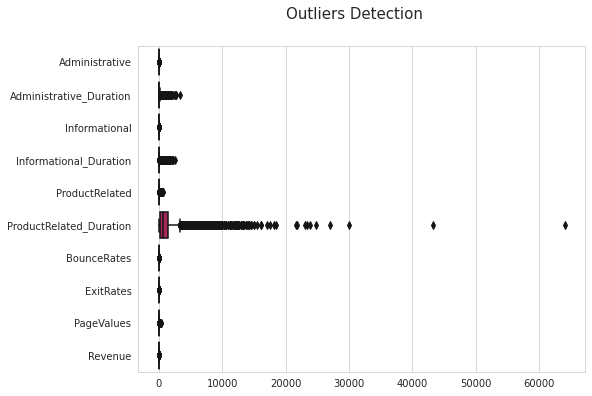

In [9]:
#check outliers
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.boxplot(data=df, orient="h", palette="rocket_r")

title_string = "Outliers Detection"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show()

**Outlier Handling for Product Related Duration**

In [10]:
#handling ouliers with IQR Method
Q1= df['ProductRelated_Duration'].quantile(0.25)
Q3= df['ProductRelated_Duration'].quantile(0.75)
IQR=Q3-Q1

In [11]:
df['ProductRelated_Duration_Outlier']= False

In [12]:
for index, row in df.iterrows():
    if row['ProductRelated_Duration']>(Q1+1.5 * IQR):
        df.at[index,'ProductRelated_Duration_Outlier']= True

In [13]:
#Sum of oulier in dataset for Productrelated Duration variable
df['ProductRelated_Duration_Outlier'].sum()

1972

In [14]:
non_outliers=df.loc[df['ProductRelated_Duration_Outlier']==False]

**Outlier Handling for Administrative Duration**

In [15]:
Q1= non_outliers['Administrative_Duration'].quantile(0.25)
Q3= non_outliers['Administrative_Duration'].quantile(0.75)
IQR=Q3-Q1

In [16]:
non_outliers['Administrative_Duration_Outlier']= False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
for index, row in non_outliers.iterrows():
    if row['Administrative_Duration']>(Q1+1.5 * IQR):
        non_outliers.at[index,'Administrative_Duration_Outlier']= True

In [18]:
non_outliers['Administrative_Duration_Outlier'].sum()

1842

In [19]:
non_outliers=non_outliers.loc[non_outliers['Administrative_Duration_Outlier']==False]

**Outlier Handling for Informational Duration**

In [20]:
Q1= non_outliers['Informational_Duration'].quantile(0.25)
Q3= non_outliers['Informational_Duration'].quantile(0.75)
IQR=Q3-Q1

In [21]:
non_outliers['Informational_Duration_Outlier']= False

In [22]:
for index, row in non_outliers.iterrows():
    if row['Informational_Duration']>(Q1+1.5 * IQR):
        non_outliers.at[index,'Informational_Duration_Outlier']= True

In [23]:
non_outliers['Informational_Duration_Outlier'].sum()

895

In [24]:
non_outliers=non_outliers.loc[non_outliers['Informational_Duration_Outlier']==False]

**Outlier Handling for Page Values**

In [25]:
Q1= non_outliers['PageValues'].quantile(0.25)
Q3= non_outliers['PageValues'].quantile(0.75)
IQR=Q3-Q1

In [26]:
non_outliers['PageValues_Outlier']= False

In [27]:
for index, row in non_outliers.iterrows():
    if row['PageValues']>(Q1+1.5 * IQR):
        non_outliers.at[index,'PageValues_Outlier']= True

In [28]:
non_outliers['PageValues_Outlier'].sum()

976

In [29]:
non_outliers=non_outliers.loc[non_outliers['PageValues_Outlier']==False]

In [30]:
#delete outliers detection column
non_outliers = non_outliers.drop(columns=['ProductRelated_Duration_Outlier',
                                          'Administrative_Duration_Outlier','Informational_Duration_Outlier','PageValues_Outlier'])

## Handling Data Imbalance

In [31]:
X = non_outliers.drop('Revenue',axis='columns')
y = non_outliers['Revenue']

In [32]:
over = SMOTE(sampling_strategy=1)                    
X, y = over.fit_resample(X, y)

# PCA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



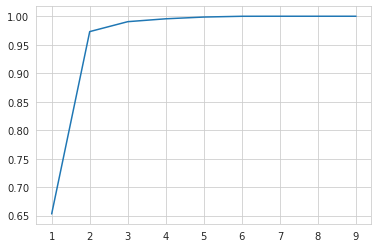

In [33]:
#Scaling/transforming data
norm = Normalizer()
X_norm = norm.fit_transform(X)

pca = PCA(n_components=9)
pca.fit(X_norm)
sns.lineplot(range(1,10),pca.explained_variance_ratio_.cumsum())

In [34]:
#calculate how much data can be explained after PCA
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [1.54427103e-01 7.56718623e-02 4.12297840e-03 1.19397778e-03
 7.25116159e-04 3.21432286e-04 1.21836645e-05 1.16610068e-35
 0.00000000e+00]
Explained variance ratio: [6.53038712e-01 3.19999886e-01 1.74351810e-02 5.04907295e-03
 3.06635889e-03 1.35926739e-03 5.15220734e-05 4.93118676e-35
 0.00000000e+00]


In [35]:
pca = PCA(n_components=2)
X_new = pd.DataFrame(pca.fit_transform(X_norm))
X_new

,0,1
0,0.847925,0.917490
1,-0.213273,0.017994
2,0.847925,0.917490
3,0.107909,0.450251
4,-0.218031,0.007536
...,...,...
12943,-0.215745,0.012608
12944,-0.215172,0.010950
12945,0.894269,-0.449541
12946,-0.192685,0.021532


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



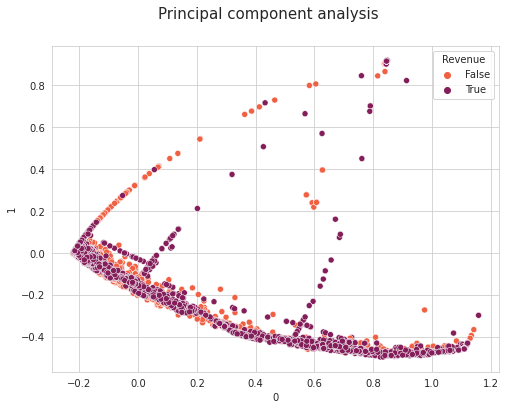

In [36]:
#Visualizing PCA
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.scatterplot(X_new[0],X_new[1], hue = y, palette="rocket_r")

title_string = "Principal component analysis"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show()

<BarContainer object of 2 artists>

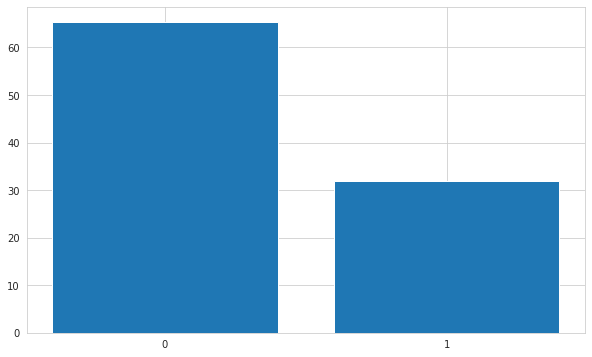

In [37]:
#visualizing PCA data variance
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(['0', '1'], pca.explained_variance_ratio_ * 100)

# K-means

## Silhouette Method

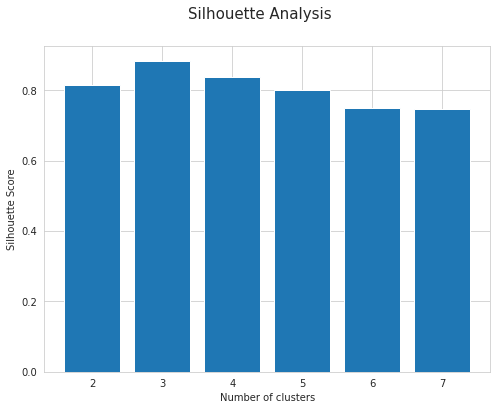

In [38]:
#silhouette analysis
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_new, KMeans(n_clusters = n_cluster).fit_predict(X_new))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.figure(figsize=(8,6))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
title_string = "Silhouette Analysis"
plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show() 

In [39]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(X_new[[0,1]])

In [40]:
#add cluster in dataset
X['cluster'] = y_predicted
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,cluster
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,2
1,0,0.000000,0,0.0,2,64.000000,0.000000,0.100000,0.0,0
2,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,2
3,0,0.000000,0,0.0,2,2.666667,0.050000,0.140000,0.0,0
4,0,0.000000,0,0.0,10,627.500000,0.020000,0.050000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
12943,0,0.000000,0,0.0,33,1403.691300,0.002493,0.029326,0.0,0
12944,0,2.155446,0,0.0,32,1416.309703,0.011285,0.048993,0.0,0
12945,2,29.332556,0,0.0,2,8.417302,0.000000,0.051708,0.0,1
12946,2,25.389441,0,0.0,70,1202.059585,0.000000,0.006326,0.0,0


## Clustering Output

Text(0.5, 0.95, 'K-means Clustering')

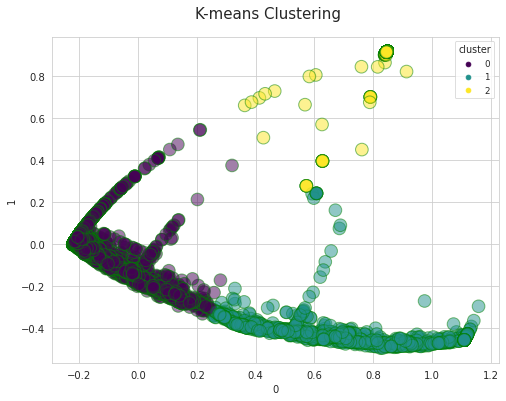

In [41]:
#add cluster in dataset
X_new['cluster'] = y_predicted

#Visualizing k-means output
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style("ticks")
sns.set_context("paper")

sns.scatterplot(
    x=0, y=1,
    hue="cluster",
    edgecolor='green',
    data=X_new,
    palette='viridis',
    s=160,
    alpha=0.5,
    ax=ax
)
title_string = "K-means Clustering"
plt.suptitle(title_string, y = 0.95, fontsize = 15) 

In [42]:
#cluster analysis in pivot table 
table = pd.pivot_table(X, values=['ProductRelated','ProductRelated_Duration','Administrative','Administrative_Duration','Informational','Informational_Duration',
                                  'BounceRates','ExitRates','PageValues'],
                       index=['cluster'],
                       aggfunc={'ProductRelated':np.median,
                                'ProductRelated_Duration':np.median,
                                'Administrative':np.median,
                                'Administrative_Duration':np.median,
                                'Informational':np.median,
                                'Informational_Duration':np.median,
                                'BounceRates':np.median,
                                'ExitRates':np.median,
                                'PageValues':np.median,})
table

,Administrative,Administrative_Duration,BounceRates,ExitRates,Informational,Informational_Duration,PageValues,ProductRelated,ProductRelated_Duration
cluster,,,,,,,,,
0,0,0.000000,0.003265,0.029320,0,0.0,0.0,14,402.645238
1,3,45.365616,0.000000,0.040697,0,0.0,0.0,2,19.264300
2,0,0.000000,0.200000,0.200000,0,0.0,0.0,1,0.000000


In [43]:
#save radar chart to png images
#%%capture
#!pip install kaleido
#!pip install plotly>=4.0.0
#!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
#!chmod +x /usr/local/bin/orca
#!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [44]:
values0 = table.loc[0].tolist()
values1 = table.loc[1].tolist()
values2 = table.loc[2].tolist()

categories = ['ProductRelated','ProductRelated_Duration','Administrative','Administrative_Duration','Informational','Informational_Duration',
                                  'BounceRates','ExitRates','PageValues']
categories = [*categories, categories[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=values0, theta=categories, fill='toself', name='Cluster 0'),
        go.Scatterpolar(r=values1, theta=categories, fill='toself', name='Cluster 1'),
        go.Scatterpolar(r=values2, theta=categories, fill='toself', name='Cluster 2')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Cluster comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)
fig.show()
#fig.write_image("cluster02.png")